In [55]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [56]:
df = pd.read_csv("./data/Housing.csv")

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [57]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [59]:
df.dropna(inplace = True)

In [60]:
df.count()

price               545
area                545
bedrooms            545
bathrooms           545
stories             545
mainroad            545
guestroom           545
basement            545
hotwaterheating     545
airconditioning     545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64

In [61]:
X = df.drop(["price"],axis = 1)

In [62]:
y = df["price"]

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [64]:
train_data = X_train.join(y_train)

In [65]:
train_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
449,1650,3,1,2,no,no,yes,no,no,0,no,unfurnished,3150000
333,3000,3,1,2,yes,no,no,no,no,0,no,semi-furnished,3920000
107,6420,3,1,3,yes,no,yes,no,no,0,yes,unfurnished,6125000
351,3600,2,1,1,yes,no,no,no,no,0,no,semi-furnished,3780000
302,2145,3,1,3,yes,no,no,no,no,1,yes,unfurnished,4200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,3120,3,1,2,yes,no,no,no,no,1,no,unfurnished,3500000
288,5040,3,1,2,yes,no,yes,no,yes,0,no,unfurnished,4200000
274,6450,4,1,2,yes,no,no,no,no,0,no,semi-furnished,4340000
125,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished,5943000


array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>],
       [<Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

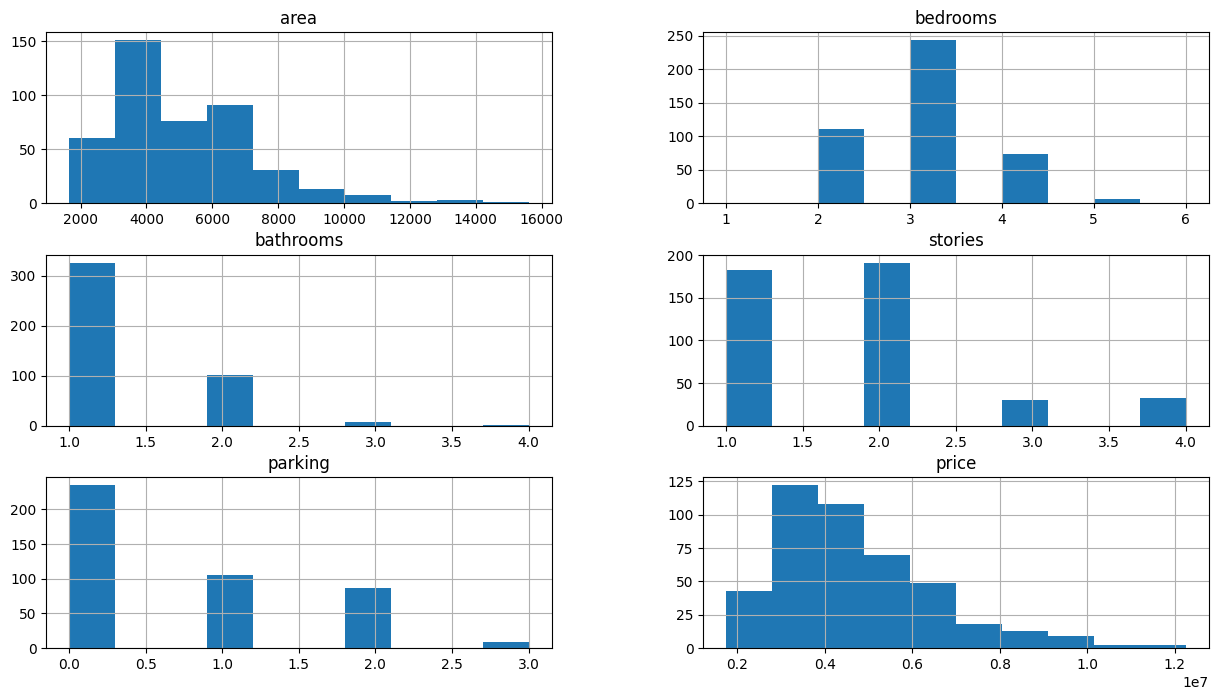

In [66]:
train_data.hist(figsize = (15,8))

In [67]:
train_data['bedrooms'] = np.log(train_data['bedrooms']+1)
train_data['bathrooms'] = np.log(train_data['bedrooms']+1)
train_data['stories'] = np.log(train_data['bedrooms']+1)
train_data['parking'] = np.log(train_data['bedrooms']+1)


array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>],
       [<Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

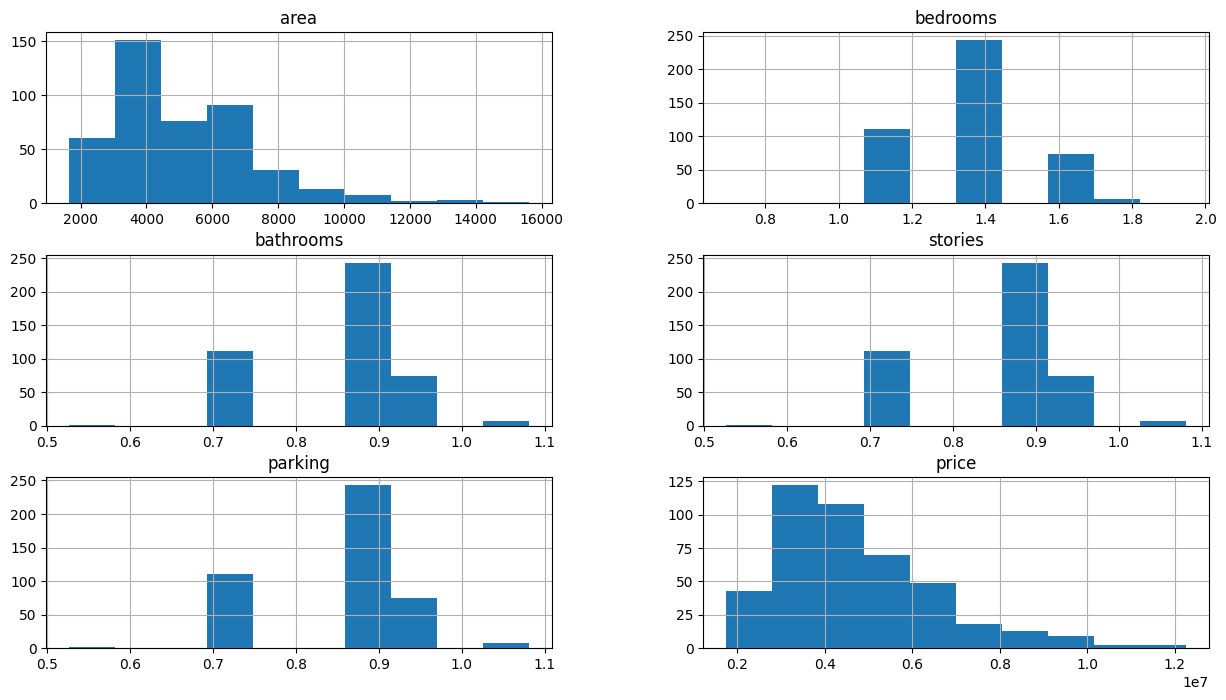

In [68]:
train_data.hist(figsize = (15,8))

<Axes: >

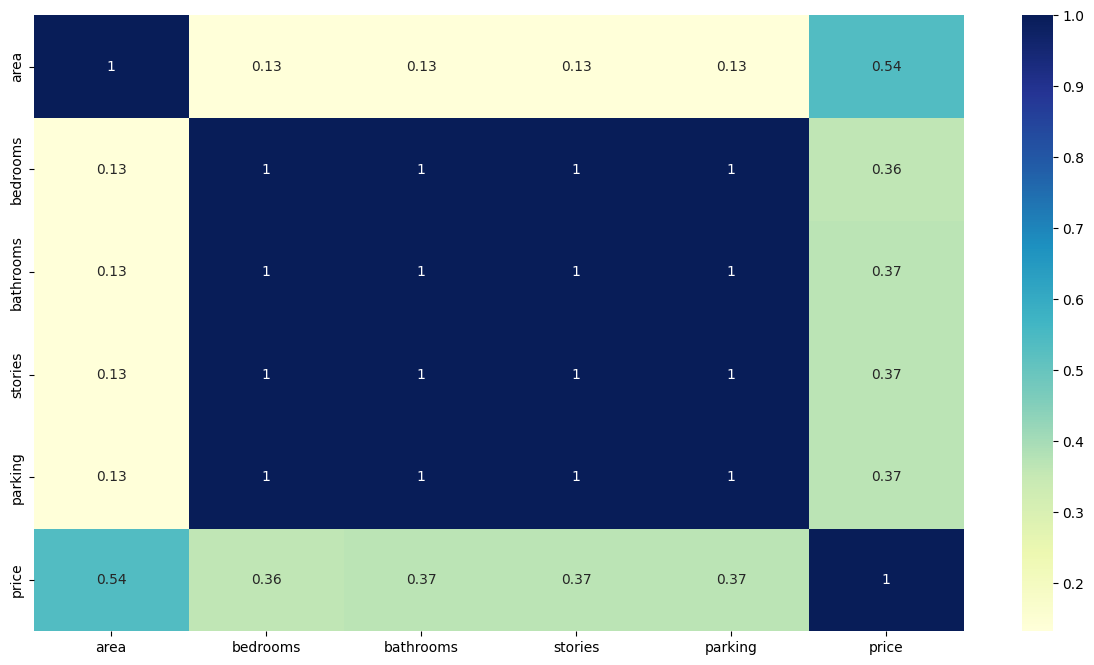

In [69]:
plt.figure(figsize =(15,8))
train_data_temp = train_data.drop(["airconditioning","hotwaterheating","guestroom","prefarea","basement","mainroad","furnishingstatus"], axis = 1)
sns.heatmap(train_data_temp.corr(),annot = True, cmap = "YlGnBu")

In [70]:
X_train = train_data.drop(["price","airconditioning","hotwaterheating","guestroom","prefarea","basement","mainroad","furnishingstatus"],axis = 1)
y_train = train_data["price"]

X_train

,area,bedrooms,bathrooms,stories,parking
449,1650,1.386294,0.869742,0.869742,0.869742
333,3000,1.386294,0.869742,0.869742,0.869742
107,6420,1.386294,0.869742,0.869742,0.869742
351,3600,1.098612,0.741276,0.741276,0.741276
302,2145,1.386294,0.869742,0.869742,0.869742
...,...,...,...,...,...
398,3120,1.386294,0.869742,0.869742,0.869742
288,5040,1.386294,0.869742,0.869742,0.869742
274,6450,1.609438,0.959135,0.959135,0.959135
125,15600,1.386294,0.869742,0.869742,0.869742


In [71]:
y_train

449    3150000
333    3920000
107    6125000
351    3780000
302    4200000
        ...   
398    3500000
288    4200000
274    4340000
125    5943000
349    3780000
Name: price, Length: 436, dtype: int64

In [72]:
test_data = X_test.join(y_test)

test_data['bedrooms'] = np.log(test_data['bedrooms']+1)
test_data['bathrooms'] = np.log(test_data['bedrooms']+1)
test_data['stories'] = np.log(test_data['bedrooms']+1)
test_data['parking'] = np.log(test_data['bedrooms']+1)

X_test = test_data.drop(["price","airconditioning","hotwaterheating","guestroom","prefarea","basement","mainroad","furnishingstatus"],axis = 1)

y_test = test_data["price"]

In [73]:
import mlflow

mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("house-pricing-experiment")

with mlflow.start_run():

    mlflow.set_tag("developer","Ritik")

    mlflow.log_param("train-data-path", "./data/housing_train_data.csv")
    mlflow.log_param("validation-data-path", "./data/housing_test_data-01.csv")

    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test,y_pred)
    mlflow.log_metric("mse",mse)

    rmse = np.sqrt(mse)
    mlflow.log_metric("rmse",rmse)

    r2 = r2_score(y_test,y_pred)
    mlflow.log_metric("r2_score",r2)

    mlflow.sklearn.log_model(model, "linear_regression_model")

    

In [74]:
mse = mean_squared_error(y_test,y_pred)
print(mse)

2823298572228.7866


In [75]:
rmse = np.sqrt(mse)
print(rmse)

1680267.4109286256


In [76]:
r2 = r2_score(y_test,y_pred)
print(r2)

0.34694658357152264


In [77]:
with open("models/lin_reg.bin", 'wb') as f_out:
    pickle.dump(model, f_out)

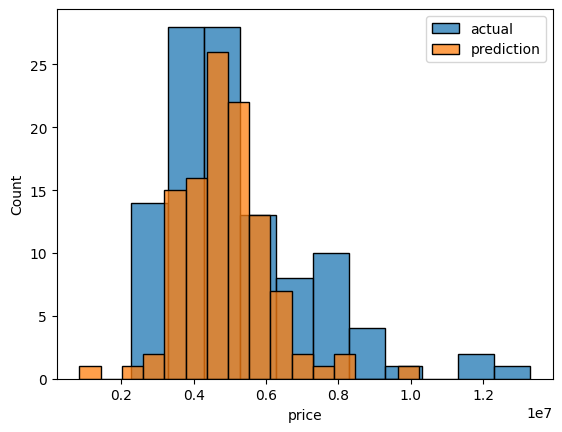

In [78]:

sns.histplot(y_test,label = "actual")
sns.histplot(y_pred,label = "prediction")
plt.legend()

In [30]:
import xgboost as xgb

In [31]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope

In [32]:
train = xgb.DMatrix(X_train, label=y_train)
valid = xgb.DMatrix(X_test, label=y_test)

In [33]:
X_train

,area,bedrooms,bathrooms,stories,parking,furnished,semi-furnished,unfurnished,mainroad_new
270,4500,1.386294,0.869742,0.869742,0.869742,True,False,False,1
345,2015,1.386294,0.869742,0.869742,0.869742,False,True,False,1
337,2145,1.609438,0.959135,0.959135,0.959135,False,False,True,1
456,2398,1.386294,0.869742,0.869742,0.869742,False,True,False,1
363,3584,1.098612,0.741276,0.741276,0.741276,False,True,False,1
...,...,...,...,...,...,...,...,...,...
208,2970,1.386294,0.869742,0.869742,0.869742,False,True,False,1
411,2145,1.386294,0.869742,0.869742,0.869742,True,False,False,1
365,5450,1.098612,0.741276,0.741276,0.741276,True,False,False,1
142,10500,1.609438,0.959135,0.959135,0.959135,False,True,False,1


In [204]:
def objective(params):
    with mlflow.start_run():
        mlflow.set_tag("model", "xgboost")
        mlflow.log_params(params)
        booster = xgb.train(
            params=params,
            dtrain=train,
            num_boost_round=1000,
            evals=[(valid, 'validation')],
            early_stopping_rounds=50
        )
        y_pred = booster.predict(valid)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mlflow.log_metric("rmse", rmse)

    return {'loss': rmse, 'status': STATUS_OK}

In [205]:
search_space = {
    'max_depth': scope.int(hp.quniform('max_depth', 4, 100, 1)),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
    'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
    'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
    'objective': 'reg:linear',
    'seed': 42
}

best_result = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=Trials()
)

[0]	validation-rmse:1723984.51022                                                                                                 
[1]	validation-rmse:1649631.25588                                                                                                 
[2]	validation-rmse:1603466.24982                                                                                                 
[3]	validation-rmse:1578680.06722                                                                                                 
[4]	validation-rmse:1568918.16577                                                                                                 
[5]	validation-rmse:1569827.41268                                                                                                 
[6]	validation-rmse:1577427.03389                                                                                                 
[7]	validation-rmse:1589140.06715                                                  

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:03] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[29]	validation-rmse:1690885.88669
[30]	validation-rmse:1691533.21983                                                                                                
[31]	validation-rmse:1692390.09329                                                                                                
[32]	validation-rmse:1693139.44758                                                                                                
[33]	validation-rmse:1693792.45208                                                                                                
[34]	validation-rmse:1694362.56814                                                                                                
[35]	validation-rmse:1694858.87819                                                                                                
[36]	validation-rmse:1695292.84593                                                                                                
[37]	validation-rmse:1695667.40056              

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:04] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[4]	validation-rmse:1527254.46467                                                                                                 
[5]	validation-rmse:1546112.42308                                                                                                 
[6]	validation-rmse:1563940.62772                                                                                                 
[7]	validation-rmse:1580260.23276                                                                                                 
[8]	validation-rmse:1593388.23080                                                                                                 
[9]	validation-rmse:1604618.40891                                                                                                 
[10]	validation-rmse:1614502.64321                                                                                                
[11]	validation-rmse:1622389.63024                                                 

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:04] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[3]	validation-rmse:1653638.47930                                                                                                 
[4]	validation-rmse:1691550.52007                                                                                                 
[5]	validation-rmse:1699409.93452                                                                                                 
[6]	validation-rmse:1705849.96968                                                                                                 
[7]	validation-rmse:1718376.96114                                                                                                 
[8]	validation-rmse:1726679.26572                                                                                                 
[9]	validation-rmse:1728800.17180                                                                                                 
[10]	validation-rmse:1732375.36322                                                 

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:05] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[2]	validation-rmse:1508775.97102                                                                                                 
[3]	validation-rmse:1447209.19394                                                                                                 
[4]	validation-rmse:1409896.37323                                                                                                 
[5]	validation-rmse:1380998.79906                                                                                                 
[6]	validation-rmse:1371018.33193                                                                                                 
[7]	validation-rmse:1371951.95727                                                                                                 
[8]	validation-rmse:1361269.89494                                                                                                 
[9]	validation-rmse:1358391.80243                                                  

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:06] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[4]	validation-rmse:1562713.19834
[5]	validation-rmse:1524142.32118                                                                                                 
[6]	validation-rmse:1492344.60940                                                                                                 
[7]	validation-rmse:1471152.73736                                                                                                 
[8]	validation-rmse:1449596.71022                                                                                                 
[9]	validation-rmse:1436468.09276                                                                                                 
[10]	validation-rmse:1423014.32347                                                                                                
[11]	validation-rmse:1413396.02976                                                                                                
[12]	validation-rmse:1408576.02555               

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:06] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[3]	validation-rmse:1437710.93251                                                                                                 
[4]	validation-rmse:1440420.76896                                                                                                 
[5]	validation-rmse:1448582.99694                                                                                                 
[6]	validation-rmse:1455431.82539                                                                                                 
[7]	validation-rmse:1458103.29674                                                                                                 
[8]	validation-rmse:1458587.44303                                                                                                 
[9]	validation-rmse:1484396.05046                                                                                                 
[10]	validation-rmse:1490040.45399                                                 

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:07] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[4]	validation-rmse:1428207.82148
[5]	validation-rmse:1400814.74414                                                                                                 
[6]	validation-rmse:1384184.69015                                                                                                 
[7]	validation-rmse:1366845.39475                                                                                                 
[8]	validation-rmse:1361436.21588                                                                                                 
[9]	validation-rmse:1367079.24217                                                                                                 
[10]	validation-rmse:1361735.78625                                                                                                
[11]	validation-rmse:1360326.14170                                                                                                
[12]	validation-rmse:1367809.22596               

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:07] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[1]	validation-rmse:1574081.76605                                                                                                 
[2]	validation-rmse:1484714.82158                                                                                                 
[3]	validation-rmse:1428689.09055                                                                                                 
[4]	validation-rmse:1395150.37066                                                                                                 
[5]	validation-rmse:1376093.19857                                                                                                 
[6]	validation-rmse:1375006.41238                                                                                                 
[7]	validation-rmse:1386489.23471                                                                                                 
[8]	validation-rmse:1390544.43364                                                  

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:08] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[5]	validation-rmse:1550905.55835
[6]	validation-rmse:1551112.87267                                                                                                 
[7]	validation-rmse:1551177.94407                                                                                                 
[8]	validation-rmse:1551197.47670                                                                                                 
[9]	validation-rmse:1551202.87973                                                                                                 
[10]	validation-rmse:1551204.47915                                                                                                
[11]	validation-rmse:1551204.94843                                                                                                
[12]	validation-rmse:1551205.09503                                                                                                
[13]	validation-rmse:1551205.14542               

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:08] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[5]	validation-rmse:1525752.36377                                                                                                 
[6]	validation-rmse:1492972.20069                                                                                                 
[7]	validation-rmse:1461863.96314                                                                                                 
[8]	validation-rmse:1439501.42839                                                                                                 
[9]	validation-rmse:1420814.12099                                                                                                 
[10]	validation-rmse:1410416.03162                                                                                                
[11]	validation-rmse:1399347.32095                                                                                                
[12]	validation-rmse:1393186.29204                                                 

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:09] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[3]	validation-rmse:1556614.13545
[4]	validation-rmse:1510969.84170                                                                                                 
[5]	validation-rmse:1473243.46825                                                                                                 
[6]	validation-rmse:1448577.76836                                                                                                 
[7]	validation-rmse:1423793.22340                                                                                                 
[8]	validation-rmse:1411971.39253                                                                                                 
[9]	validation-rmse:1395278.81703                                                                                                 
[10]	validation-rmse:1382404.75449                                                                                                
[11]	validation-rmse:1371511.64415               

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:09] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[5]	validation-rmse:1726456.31880
[6]	validation-rmse:1728240.42231                                                                                                 
[7]	validation-rmse:1754467.29099                                                                                                 
[8]	validation-rmse:1758350.57040                                                                                                 
[9]	validation-rmse:1767967.56632                                                                                                 
[10]	validation-rmse:1762049.43864                                                                                                
[11]	validation-rmse:1769063.75371                                                                                                
[12]	validation-rmse:1767910.40908                                                                                                
[13]	validation-rmse:1773176.66554               

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:10] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:1573836.80264                                                                                                 
[1]	validation-rmse:1464833.04721                                                                                                 
[2]	validation-rmse:1422521.33184                                                                                                 
[3]	validation-rmse:1424832.30343                                                                                                 
[4]	validation-rmse:1430183.30511                                                                                                 
[5]	validation-rmse:1439192.70760                                                                                                 
[6]	validation-rmse:1452136.16939                                                                                                 
[7]	validation-rmse:1455038.77847                                                  

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:10] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[3]	validation-rmse:1402986.81218                                                                                                 
[4]	validation-rmse:1387999.81002                                                                                                 
[5]	validation-rmse:1398428.59097                                                                                                 
[6]	validation-rmse:1401124.49309                                                                                                 
[7]	validation-rmse:1408576.61853                                                                                                 
[8]	validation-rmse:1409832.67030                                                                                                 
[9]	validation-rmse:1416669.79410                                                                                                 
[10]	validation-rmse:1420055.37522                                                 

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:11] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[2]	validation-rmse:1648250.18233
[3]	validation-rmse:1696939.30986                                                                                                 
[4]	validation-rmse:1729450.64968                                                                                                 
[5]	validation-rmse:1749456.37809                                                                                                 
[6]	validation-rmse:1761331.39988                                                                                                 
[7]	validation-rmse:1768255.68340                                                                                                 
[8]	validation-rmse:1772255.44520                                                                                                 
[9]	validation-rmse:1774554.08485                                                                                                 
[10]	validation-rmse:1775871.33916               

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:11] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[3]	validation-rmse:1659912.04720
[4]	validation-rmse:1626649.59178                                                                                                 
[5]	validation-rmse:1598986.55318                                                                                                 
[6]	validation-rmse:1574140.10852                                                                                                 
[7]	validation-rmse:1549293.25076                                                                                                 
[8]	validation-rmse:1527344.94460                                                                                                 
[9]	validation-rmse:1507149.47830                                                                                                 
[10]	validation-rmse:1488189.30937                                                                                                
[11]	validation-rmse:1472482.53985               

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:12] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[2]	validation-rmse:1408975.55477                                                                                                 
[3]	validation-rmse:1432891.39276                                                                                                 
[4]	validation-rmse:1459041.52736                                                                                                 
[5]	validation-rmse:1474146.79483                                                                                                 
[6]	validation-rmse:1490556.82731                                                                                                 
[7]	validation-rmse:1489142.84415                                                                                                 
[8]	validation-rmse:1505309.46692                                                                                                 
[9]	validation-rmse:1515067.36729                                                  

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:13] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[6]	validation-rmse:1317538.65814
[7]	validation-rmse:1312123.82979                                                                                                 
[8]	validation-rmse:1305171.47959                                                                                                 
[9]	validation-rmse:1306940.51102                                                                                                 
[10]	validation-rmse:1307501.49007                                                                                                
[11]	validation-rmse:1307800.68010                                                                                                
[12]	validation-rmse:1316516.09636                                                                                                
[13]	validation-rmse:1313358.96088                                                                                                
[14]	validation-rmse:1318103.26978               

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:13] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[2]	validation-rmse:1616710.15190
[3]	validation-rmse:1573267.76359                                                                                                 
[4]	validation-rmse:1531430.02131                                                                                                 
[5]	validation-rmse:1492186.19964                                                                                                 
[6]	validation-rmse:1467513.32060                                                                                                 
[7]	validation-rmse:1443229.77777                                                                                                 
[8]	validation-rmse:1428039.76199                                                                                                 
[9]	validation-rmse:1417545.33342                                                                                                 
[10]	validation-rmse:1409971.28942               

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:14] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[3]	validation-rmse:1387865.30457                                                                                                 
[4]	validation-rmse:1410190.56480                                                                                                 
[5]	validation-rmse:1401151.39350                                                                                                 
[6]	validation-rmse:1415923.78307                                                                                                 
[7]	validation-rmse:1421070.71039                                                                                                 
[8]	validation-rmse:1431347.29172                                                                                                 
[9]	validation-rmse:1426026.15149                                                                                                 
[10]	validation-rmse:1460278.14286                                                 

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



[0]	validation-rmse:1733475.33150                                                                                                 
[1]	validation-rmse:1649368.57417                                                                                                 
[2]	validation-rmse:1572044.23220                                                                                                 
[3]	validation-rmse:1520532.97347                                                                                                 
[4]	validation-rmse:1473329.99311                                                                                                 
[5]	validation-rmse:1447097.47208                                                                                                 
[6]	validation-rmse:1419971.33281                                                                                                 
[7]	validation-rmse:1401333.90576                                                  

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:14] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[34]	validation-rmse:1401249.98893                                                                                                
[35]	validation-rmse:1403657.84431                                                                                                
[36]	validation-rmse:1405802.97976                                                                                                
[37]	validation-rmse:1406958.51224                                                                                                
[38]	validation-rmse:1411137.20802                                                                                                
[39]	validation-rmse:1410392.96764                                                                                                
[40]	validation-rmse:1415915.28622                                                                                                
[41]	validation-rmse:1417266.88551                                                 

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:15] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[3]	validation-rmse:1661928.21706                                                                                                 
[4]	validation-rmse:1631199.11223                                                                                                 
[5]	validation-rmse:1598310.87081                                                                                                 
[6]	validation-rmse:1567129.42859                                                                                                 
[7]	validation-rmse:1538998.72678                                                                                                 
[8]	validation-rmse:1515470.67861                                                                                                 
[9]	validation-rmse:1492263.75314                                                                                                 
[10]	validation-rmse:1473083.72858                                                 

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



[0]	validation-rmse:1464458.39984                                                                                                 
[1]	validation-rmse:1382141.66477                                                                                                 
[2]	validation-rmse:1402699.12497                                                                                                 
[3]	validation-rmse:1373943.11005                                                                                                 
[4]	validation-rmse:1384552.99680                                                                                                 
[5]	validation-rmse:1389727.19793                                                                                                 
[6]	validation-rmse:1422490.34301                                                                                                 
[7]	validation-rmse:1413813.66689                                                  

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:15] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[43]	validation-rmse:1622149.94269                                                                                                
[44]	validation-rmse:1624526.37798                                                                                                
[45]	validation-rmse:1625005.93598                                                                                                
[46]	validation-rmse:1635979.49992                                                                                                
[47]	validation-rmse:1627943.39640                                                                                                
[48]	validation-rmse:1636909.25665                                                                                                
[49]	validation-rmse:1636570.96938                                                                                                
[50]	validation-rmse:1640816.72319                                                 

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:16] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[2]	validation-rmse:1658897.06795                                                                                                 
[3]	validation-rmse:1615328.41841                                                                                                 
[4]	validation-rmse:1578900.03072                                                                                                 
[5]	validation-rmse:1553022.25519                                                                                                 
[6]	validation-rmse:1523574.53413                                                                                                 
[7]	validation-rmse:1501660.88231                                                                                                 
[8]	validation-rmse:1483561.43308                                                                                                 
[9]	validation-rmse:1468311.66778                                                  

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:16] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[3]	validation-rmse:1635854.80632                                                                                                 
[4]	validation-rmse:1602619.65728                                                                                                 
[5]	validation-rmse:1573507.47484                                                                                                 
[6]	validation-rmse:1543006.51003                                                                                                 
[7]	validation-rmse:1517462.79400                                                                                                 
[8]	validation-rmse:1495380.94935                                                                                                 
[9]	validation-rmse:1475906.03160                                                                                                 
[10]	validation-rmse:1459423.02225                                                 

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:17] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[1]	validation-rmse:1745743.25068                                                                                                 
[2]	validation-rmse:1706422.22029                                                                                                 
[3]	validation-rmse:1667107.25466                                                                                                 
[4]	validation-rmse:1635633.89388                                                                                                 
[5]	validation-rmse:1603104.35965                                                                                                 
[6]	validation-rmse:1579952.23348                                                                                                 
[7]	validation-rmse:1558592.62467                                                                                                 
[8]	validation-rmse:1533327.36631                                                  

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:18] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[3]	validation-rmse:1652677.45578
[4]	validation-rmse:1620765.47058                                                                                                 
[5]	validation-rmse:1590528.67211                                                                                                 
[6]	validation-rmse:1557906.57978                                                                                                 
[7]	validation-rmse:1531602.44954                                                                                                 
[8]	validation-rmse:1507439.18610                                                                                                 
[9]	validation-rmse:1482735.97406                                                                                                 
[10]	validation-rmse:1458907.24753                                                                                                
[11]	validation-rmse:1441538.25292               

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



[0]	validation-rmse:1789030.15717                                                                                                 
[1]	validation-rmse:1747106.89040                                                                                                 
[2]	validation-rmse:1713413.30193                                                                                                 
[3]	validation-rmse:1678435.17212                                                                                                 
[4]	validation-rmse:1646720.25562                                                                                                 
[5]	validation-rmse:1618259.91198                                                                                                 
[6]	validation-rmse:1593656.26295                                                                                                 
[7]	validation-rmse:1568489.37310                                                  

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:18] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[65]	validation-rmse:1314445.97667                                                                                                
[66]	validation-rmse:1317395.04873                                                                                                
[67]	validation-rmse:1318754.84037                                                                                                
[68]	validation-rmse:1319153.33677                                                                                                
[69]	validation-rmse:1319033.92830                                                                                                
[70]	validation-rmse:1319561.28392                                                                                                
[71]	validation-rmse:1324000.23885                                                                                                
[72]	validation-rmse:1325042.86612                                                 

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



[0]	validation-rmse:1727985.66756                                                                                                 
[1]	validation-rmse:1654624.68838                                                                                                 
[2]	validation-rmse:1607036.87757                                                                                                 
[3]	validation-rmse:1580411.12358                                                                                                 
[4]	validation-rmse:1569044.03595                                                                                                 
[5]	validation-rmse:1567836.32282                                                                                                 
[6]	validation-rmse:1573524.60875                                                                                                 
[7]	validation-rmse:1583683.98805                                                  

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:19] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[26]	validation-rmse:1673331.66290                                                                                                
[27]	validation-rmse:1675033.27803                                                                                                
[28]	validation-rmse:1676538.34595                                                                                                
[29]	validation-rmse:1677852.54711                                                                                                
[30]	validation-rmse:1679036.47199                                                                                                
[31]	validation-rmse:1680076.09072                                                                                                
[32]	validation-rmse:1680991.06345                                                                                                
[33]	validation-rmse:1681794.12347                                                 

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:19] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[3]	validation-rmse:1670805.82398                                                                                                 
[4]	validation-rmse:1641095.76039                                                                                                 
[5]	validation-rmse:1615945.38887                                                                                                 
[6]	validation-rmse:1592974.82479                                                                                                 
[7]	validation-rmse:1567380.31935                                                                                                 
[8]	validation-rmse:1548097.70767                                                                                                 
[9]	validation-rmse:1529009.45961                                                                                                 
[10]	validation-rmse:1511209.64692                                                 

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:20] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[4]	validation-rmse:1525989.27866
[5]	validation-rmse:1491999.31596                                                                                                 
[6]	validation-rmse:1470300.40593                                                                                                 
[7]	validation-rmse:1449610.09328                                                                                                 
[8]	validation-rmse:1433287.70029                                                                                                 
[9]	validation-rmse:1422337.93382                                                                                                 
[10]	validation-rmse:1408713.64944                                                                                                
[11]	validation-rmse:1396722.86181                                                                                                
[12]	validation-rmse:1390492.24598               

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:20] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[5]	validation-rmse:1379760.90008                                                                                                 
[6]	validation-rmse:1369503.94935                                                                                                 
[7]	validation-rmse:1349446.75306                                                                                                 
[8]	validation-rmse:1333207.73200                                                                                                 
[9]	validation-rmse:1321156.05888                                                                                                 
[10]	validation-rmse:1322395.38573                                                                                                
[11]	validation-rmse:1317128.74971                                                                                                
[12]	validation-rmse:1313133.09563                                                 

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



[0]	validation-rmse:1771838.31136                                                                                                 
[1]	validation-rmse:1715026.94495                                                                                                 
[2]	validation-rmse:1669128.50062                                                                                                 
[3]	validation-rmse:1630725.36344                                                                                                 
[4]	validation-rmse:1595023.84912                                                                                                 
[5]	validation-rmse:1567052.76979                                                                                                 
[6]	validation-rmse:1538038.79120                                                                                                 
[7]	validation-rmse:1516441.72759                                                  

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:21] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[38]	validation-rmse:1426241.96001                                                                                                
[39]	validation-rmse:1427312.31755                                                                                                
[40]	validation-rmse:1428453.68483                                                                                                
[41]	validation-rmse:1432006.73879                                                                                                
[42]	validation-rmse:1433427.42337                                                                                                
[43]	validation-rmse:1435432.15630                                                                                                
[44]	validation-rmse:1436359.11452                                                                                                
[45]	validation-rmse:1440047.62685                                                 

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:22] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[2]	validation-rmse:1698878.37990
[3]	validation-rmse:1666342.39451                                                                                                 
[4]	validation-rmse:1634386.71661                                                                                                 
[5]	validation-rmse:1609989.26402                                                                                                 
[6]	validation-rmse:1590671.19621                                                                                                 
[7]	validation-rmse:1577827.71480                                                                                                 
[8]	validation-rmse:1554582.54281                                                                                                 
[9]	validation-rmse:1537391.25171                                                                                                 
[10]	validation-rmse:1521992.58214               

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:22] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[3]	validation-rmse:1569709.42382                                                                                                 
[4]	validation-rmse:1535296.66958                                                                                                 
[5]	validation-rmse:1509640.10331                                                                                                 
[6]	validation-rmse:1482443.63173                                                                                                 
[7]	validation-rmse:1456508.46753                                                                                                 
[8]	validation-rmse:1437337.15133                                                                                                 
[9]	validation-rmse:1421270.67659                                                                                                 
[10]	validation-rmse:1413742.33231                                                 

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:23] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:1760106.97416                                                                                                 
[1]	validation-rmse:1700787.37777                                                                                                 
[2]	validation-rmse:1643703.21410                                                                                                 
[3]	validation-rmse:1591411.96555                                                                                                 
[4]	validation-rmse:1552664.14976                                                                                                 
[5]	validation-rmse:1523180.05569                                                                                                 
[6]	validation-rmse:1497122.41289                                                                                                 
[7]	validation-rmse:1476325.87777                                                  

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:23] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[2]	validation-rmse:1572882.75808                                                                                                 
[3]	validation-rmse:1595198.28972                                                                                                 
[4]	validation-rmse:1625810.55180                                                                                                 
[5]	validation-rmse:1656011.86865                                                                                                 
[6]	validation-rmse:1682381.76924                                                                                                 
[7]	validation-rmse:1704158.62155                                                                                                 
[8]	validation-rmse:1721512.59702                                                                                                 
[9]	validation-rmse:1735054.72043                                                  

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



[0]	validation-rmse:1696442.74734                                                                                                 
[1]	validation-rmse:1583443.11566                                                                                                 
[2]	validation-rmse:1512264.86699                                                                                                 
[3]	validation-rmse:1453413.77717                                                                                                 
[4]	validation-rmse:1406747.56341                                                                                                 
[5]	validation-rmse:1381802.41195                                                                                                 
[6]	validation-rmse:1362337.13381                                                                                                 
[7]	validation-rmse:1352399.17671                                                  

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:24] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[32]	validation-rmse:1404061.32825
[33]	validation-rmse:1408446.82074                                                                                                
[34]	validation-rmse:1413120.37595                                                                                                
[35]	validation-rmse:1418439.25461                                                                                                
[36]	validation-rmse:1425237.35011                                                                                                
[37]	validation-rmse:1423813.47083                                                                                                
[38]	validation-rmse:1428005.27260                                                                                                
[39]	validation-rmse:1426857.98906                                                                                                
[40]	validation-rmse:1431397.59031              

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:25] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[1]	validation-rmse:1742178.59396                                                                                                 
[2]	validation-rmse:1702159.91636                                                                                                 
[3]	validation-rmse:1667979.98629                                                                                                 
[4]	validation-rmse:1635723.92016                                                                                                 
[5]	validation-rmse:1608756.71852                                                                                                 
[6]	validation-rmse:1584906.98176                                                                                                 
[7]	validation-rmse:1563456.90396                                                                                                 
[8]	validation-rmse:1539592.37262                                                  

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:25] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[4]	validation-rmse:1487085.39472                                                                                                 
[5]	validation-rmse:1453581.27125                                                                                                 
[6]	validation-rmse:1436871.31732                                                                                                 
[7]	validation-rmse:1409749.06243                                                                                                 
[8]	validation-rmse:1386132.38199                                                                                                 
[9]	validation-rmse:1374280.97088                                                                                                 
[10]	validation-rmse:1359704.56223                                                                                                
[11]	validation-rmse:1355389.28553                                                 

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:26] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[2]	validation-rmse:1550861.99749                                                                                                 
[3]	validation-rmse:1487435.92609                                                                                                 
[4]	validation-rmse:1439367.27019                                                                                                 
[5]	validation-rmse:1416694.46350                                                                                                 
[6]	validation-rmse:1398570.15856                                                                                                 
[7]	validation-rmse:1383316.34573                                                                                                 
[8]	validation-rmse:1375651.72176                                                                                                 
[9]	validation-rmse:1364705.21250                                                  

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:26] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[1]	validation-rmse:1721939.85765
[2]	validation-rmse:1671832.75025                                                                                                 
[3]	validation-rmse:1629335.46891                                                                                                 
[4]	validation-rmse:1591124.13261                                                                                                 
[5]	validation-rmse:1559352.78783                                                                                                 
[6]	validation-rmse:1530741.89928                                                                                                 
[7]	validation-rmse:1507958.98473                                                                                                 
[8]	validation-rmse:1483954.54119                                                                                                 
[9]	validation-rmse:1469787.01481                

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



[0]	validation-rmse:1635369.24588                                                                                                 
[1]	validation-rmse:1533846.57075                                                                                                 
[2]	validation-rmse:1494301.11613                                                                                                 
[3]	validation-rmse:1478198.10493                                                                                                 
[4]	validation-rmse:1459399.14185                                                                                                 
[5]	validation-rmse:1461492.73678                                                                                                 
[6]	validation-rmse:1455675.59168                                                                                                 
[7]	validation-rmse:1457453.30136                                                  

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:27] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[17]	validation-rmse:1546735.68001                                                                                                
[18]	validation-rmse:1554749.13751                                                                                                
[19]	validation-rmse:1563466.01577                                                                                                
[20]	validation-rmse:1567320.20350                                                                                                
[21]	validation-rmse:1577309.09804                                                                                                
[22]	validation-rmse:1577355.81785                                                                                                
[23]	validation-rmse:1582946.01932                                                                                                
[24]	validation-rmse:1586909.75677                                                 

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:27] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[2]	validation-rmse:1493469.33059                                                                                                 
[3]	validation-rmse:1436107.28724                                                                                                 
[4]	validation-rmse:1414614.26497                                                                                                 
[5]	validation-rmse:1380597.81299                                                                                                 
[6]	validation-rmse:1371514.41469                                                                                                 
[7]	validation-rmse:1361133.36018                                                                                                 
[8]	validation-rmse:1360225.54896                                                                                                 
[9]	validation-rmse:1370476.55017                                                  

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



[0]	validation-rmse:1779716.69975                                                                                                 
[1]	validation-rmse:1732984.90335                                                                                                 
[2]	validation-rmse:1689535.64498                                                                                                 
[3]	validation-rmse:1650030.01634                                                                                                 
[4]	validation-rmse:1615365.34285                                                                                                 
[5]	validation-rmse:1586623.59988                                                                                                 
[6]	validation-rmse:1557703.96324                                                                                                 
[7]	validation-rmse:1534631.91938                                                  

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:28] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[47]	validation-rmse:1391639.20256                                                                                                
[48]	validation-rmse:1395062.99572                                                                                                
[49]	validation-rmse:1392786.17171                                                                                                
[50]	validation-rmse:1392432.39265                                                                                                
[51]	validation-rmse:1394549.19622                                                                                                
[52]	validation-rmse:1394338.70599                                                                                                
[53]	validation-rmse:1396759.15983                                                                                                
[54]	validation-rmse:1397605.75171                                                 

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:29] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[3]	validation-rmse:1639910.63474                                                                                                 
[4]	validation-rmse:1611623.72081                                                                                                 
[5]	validation-rmse:1588695.33355                                                                                                 
[6]	validation-rmse:1572178.53377                                                                                                 
[7]	validation-rmse:1549905.92808                                                                                                 
[8]	validation-rmse:1536028.68157                                                                                                 
[9]	validation-rmse:1522491.07051                                                                                                 
[10]	validation-rmse:1510549.07204                                                 

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:29] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[2]	validation-rmse:1630506.32708
[3]	validation-rmse:1579515.67405                                                                                                 
[4]	validation-rmse:1547445.29727                                                                                                 
[5]	validation-rmse:1507849.18557                                                                                                 
[6]	validation-rmse:1483858.79842                                                                                                 
[7]	validation-rmse:1453876.46092                                                                                                 
[8]	validation-rmse:1431171.57731                                                                                                 
[9]	validation-rmse:1417736.20668                                                                                                 
[10]	validation-rmse:1402698.81082               

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



[0]	validation-rmse:1597145.08008                                                                                                 
[1]	validation-rmse:1517264.51311                                                                                                 
[2]	validation-rmse:1522240.35910                                                                                                 
[3]	validation-rmse:1546210.63004                                                                                                 
[4]	validation-rmse:1567759.81963                                                                                                 
[5]	validation-rmse:1585196.22647                                                                                                 
[6]	validation-rmse:1597862.96112                                                                                                 
[7]	validation-rmse:1604115.76620                                                  

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:30] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[30]	validation-rmse:1617937.88748                                                                                                
[31]	validation-rmse:1617937.91125                                                                                                
[32]	validation-rmse:1617937.90875                                                                                                
[33]	validation-rmse:1617937.90507                                                                                                
[34]	validation-rmse:1617937.89166                                                                                                
[35]	validation-rmse:1617937.88308                                                                                                
[36]	validation-rmse:1617937.86915                                                                                                
[37]	validation-rmse:1617937.86080                                                 

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:30] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[4]	validation-rmse:1342730.24130                                                                                                 
[5]	validation-rmse:1352506.82906                                                                                                 
[6]	validation-rmse:1354713.44796                                                                                                 
[7]	validation-rmse:1364412.84062                                                                                                 
[8]	validation-rmse:1376927.65186                                                                                                 
[9]	validation-rmse:1380546.15393                                                                                                 
[10]	validation-rmse:1384728.64419                                                                                                
[11]	validation-rmse:1384273.74685                                                 

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:25:31] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[2]	validation-rmse:1425297.05774
[3]	validation-rmse:1413167.49295                                                                                                 
[4]	validation-rmse:1411507.52442                                                                                                 
[5]	validation-rmse:1423913.27987                                                                                                 
[6]	validation-rmse:1435453.70626                                                                                                 
[7]	validation-rmse:1449288.92408                                                                                                 
[8]	validation-rmse:1452829.54761                                                                                                 
[9]	validation-rmse:1463199.41577                                                                                                 
[10]	validation-rmse:1465783.75697               

/opt/conda/envs/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



In [211]:
params = {"learning_rate":0.05503885485373536,
"max_depth":66,
"min_child_weight":19.4147806239121,
"objective": "reg:linear",
"reg_alpha":0.22717205571212018,
"reg_lambda":0.33137442210843054,
"seed" :42 }

mlflow.xgboost.autolog()

booster = xgb.train(
            params=params,
            dtrain=train,
            num_boost_round=1000,
            evals=[(valid, 'validation')],
            early_stopping_rounds=50)

2024/07/01 10:11:19 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.
2024/07/01 10:11:19 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4f4244ef75764938ad5bd8d08f8642ab', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current xgboost workflow


[0]	validation-rmse:1783484.10758


/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:11:19] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[1]	validation-rmse:1739281.97406
[2]	validation-rmse:1699012.88717
[3]	validation-rmse:1661928.21706
[4]	validation-rmse:1631199.11223
[5]	validation-rmse:1598310.87081
[6]	validation-rmse:1567129.42859
[7]	validation-rmse:1538998.72678
[8]	validation-rmse:1515470.67861
[9]	validation-rmse:1492263.75314
[10]	validation-rmse:1473083.72858
[11]	validation-rmse:1454508.37108
[12]	validation-rmse:1445034.89741
[13]	validation-rmse:1430709.43696
[14]	validation-rmse:1417246.60896
[15]	validation-rmse:1407262.00822
[16]	validation-rmse:1396410.62461
[17]	validation-rmse:1388214.92340
[18]	validation-rmse:1381120.35119
[19]	validation-rmse:1371327.10082
[20]	validation-rmse:1365988.44833
[21]	validation-rmse:1357713.07523
[22]	validation-rmse:1353967.84842
[23]	validation-rmse:1347559.77769
[24]	validation-rmse:1345477.42332
[25]	validation-rmse:1339950.75182
[26]	validation-rmse:1338360.58587
[27]	validation-rmse:1333849.55941
[28]	validation-rmse:1333043.37322
[29]	validation-rmse:1329769.

2024/07/01 10:11:20 WARNING mlflow.xgboost: Failed to infer model signature: could not sample data to infer model signature: please ensure that autologging is enabled before constructing the dataset.
2024/07/01 10:11:20 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/conda/envs/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:11:20] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
